In [1]:
from Bayesian_Neural_Network import bayesian_neural_network
from BNN_Learning_Rate_Tuning import bnn_learning_rate_tuning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(10120024)

# Data Preparation

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
feature_columns = df.columns[1:-2]
target_columns = df.columns[-1]

In [5]:
for feature_column in feature_columns:
    df[feature_column] -= np.min(df[feature_column])
    df[feature_column] /= np.max(df[feature_column])

In [6]:
df['Class'].replace(0, -1, inplace=True)

In [7]:
df['Class'].value_counts()

Class
-1    284315
 1       492
Name: count, dtype: int64

# Model Performance On 100 Samples of Non-Fraudulent Data

In [8]:
df_minus_1 = df.loc[df['Class'] == -1, :].head(100)

In [9]:
feature_data = df_minus_1.loc[:, feature_columns].values
target_data = df_minus_1.loc[:, target_columns].values

In [11]:
input_layer = [28]
hidden_layers = [64, 32, 16, 8, 4, 2]
output_layer = [1]

total_epochs = 25
learning_rate = 1e-2
validation_percentage = 0.1

model_purpose = 'binary'
learning_rate_decay_type = 'exponential'

In [12]:
bnn = bayesian_neural_network(input_layer, 
                              hidden_layers, 
                              output_layer, 
                              feature_data, 
                              target_data, 
                              validation_percentage=validation_percentage,
                              model_purpose=model_purpose, 
                              learning_rate=learning_rate)
bnn.standardize_dataset()
bnn.generate_validation_training_dataset()
bnn.generate_m()
bnn.generate_v()

In [13]:
# model performance after training
bnn.bnn_fp.feed_forward_neural_network(bnn.m, bnn.v, bnn.feature_data, bnn.model_structure, model_purpose=bnn.model_purpose)[0]

array([-0.28 , -0.288, -0.28 , -0.272, -0.288, -0.288, -0.28 , -0.288,
       -0.272, -0.28 , -0.264, -0.264, -0.296, -0.28 , -0.272, -0.28 ,
       -0.288, -0.28 , -0.296, -0.288, -0.288, -0.272, -0.28 , -0.272,
       -0.272, -0.28 , -0.288, -0.296, -0.28 , -0.288, -0.288, -0.288,
       -0.296, -0.296, -0.296, -0.296, -0.28 , -0.288, -0.28 , -0.288,
       -0.248, -0.288, -0.288, -0.272, -0.28 , -0.288, -0.28 , -0.272,
       -0.272, -0.288, -0.288, -0.296, -0.264, -0.288, -0.288, -0.28 ,
       -0.272, -0.272, -0.288, -0.296, -0.28 , -0.272, -0.28 , -0.272,
       -0.272, -0.288, -0.288, -0.28 , -0.28 , -0.256, -0.288, -0.272,
       -0.28 , -0.272, -0.288, -0.28 , -0.28 , -0.288, -0.28 , -0.272,
       -0.288, -0.288, -0.296, -0.272, -0.28 , -0.272, -0.28 , -0.288,
       -0.272, -0.264])

In [14]:
bnn.train_model(total_epochs)

------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 1 / 25 - Learning Rate : 0.01 - Succesfull Train Percentage : 100.0% - Time Passed : 0.53 Second
Accuracy : 100.0% - Standard Deviation : 0.9302522740674407
Validation Accuracy : 100.0% - Validation Standard Deviation : 0.9571127077197502
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 2 / 25 - Learning Rate : 0.01 - Succesfull Train Percentage : 100.0% - Time Passed : 0.51 Second
Accuracy : 100.0% - Standard Deviation : 0.9569575269947712
Validation Accuracy : 100.0% - Validation Standard Deviation : 0.9373918868930172
-----------------------------------------------------

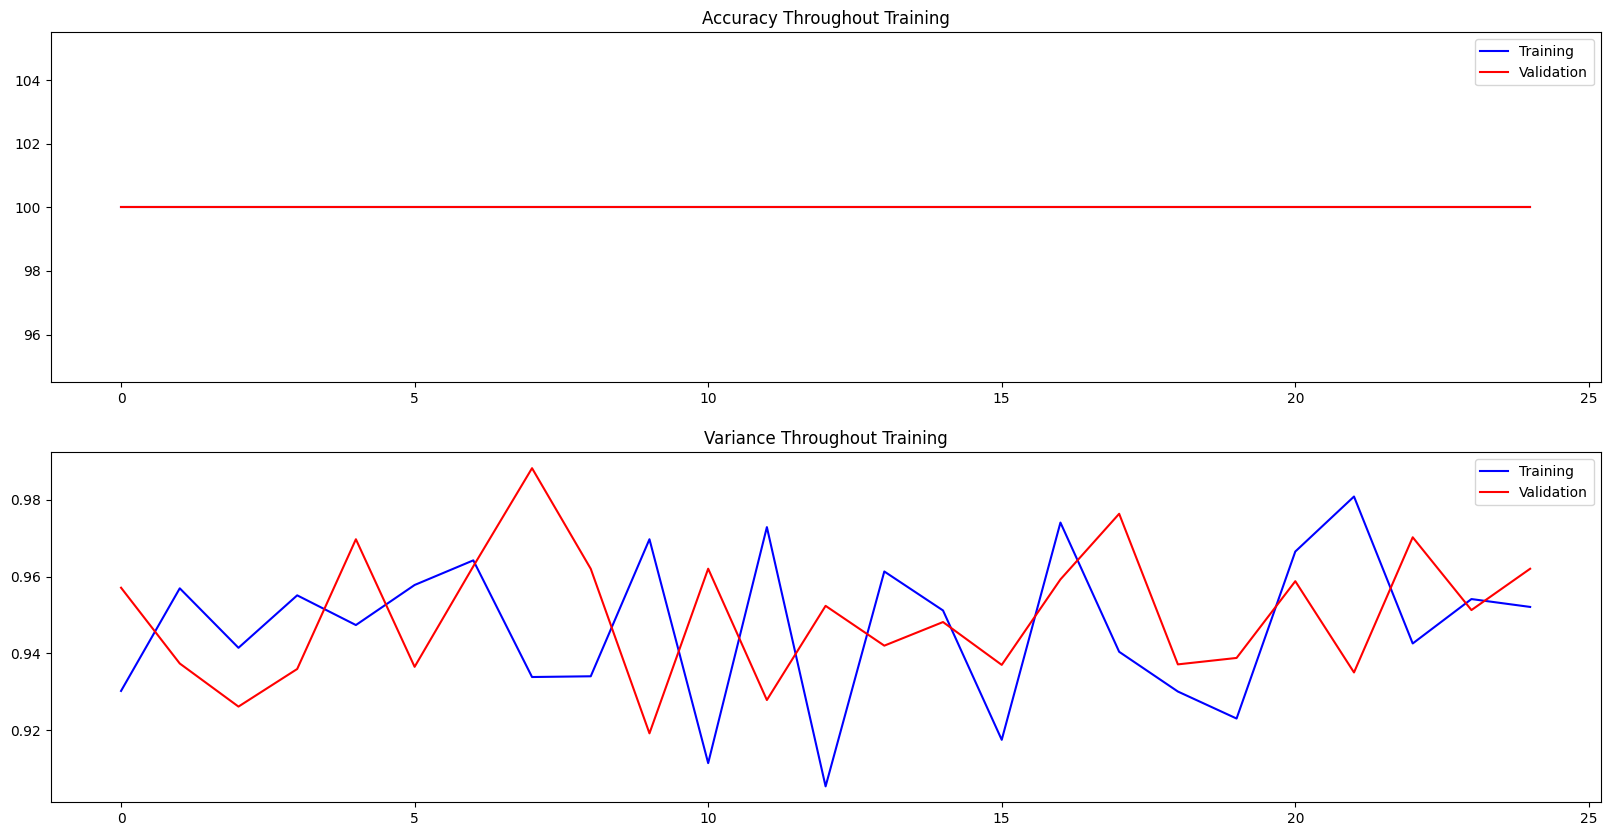

In [15]:
bnn.visualize_model_performance()

In [ ]:
# model performance after training
bnn.bnn_fp.feed_forward_neural_network(bnn.m, bnn.v, bnn.feature_data, bnn.model_structure, model_purpose=bnn.model_purpose)[0]

# Model Performance On 100 Samples of Fraudulent Data

In [16]:
df_1 = df.loc[df['Class'] == 1, :].head(100)

In [17]:
feature_data = df_1.loc[:, feature_columns].values
target_data = df_1.loc[:, target_columns].values

In [18]:
input_layer = [28]
hidden_layers = [64, 32, 16, 8, 4, 2]
output_layer = [1]

total_epochs = 25
learning_rate = 1e-2

validation_percentage = 0.1
model_purpose = 'binary'
learning_rate_decay_type = 'exponential'

In [19]:
bnn = bayesian_neural_network(input_layer, 
                              hidden_layers, 
                              output_layer, 
                              feature_data, 
                              target_data, 
                              validation_percentage=validation_percentage,
                              model_purpose=model_purpose, 
                              learning_rate=learning_rate)
bnn.standardize_dataset()
bnn.generate_validation_training_dataset()
bnn.generate_m()
bnn.generate_v()

In [20]:
# model performance before training
bnn.bnn_fp.feed_forward_neural_network(bnn.m, bnn.v, bnn.feature_data, bnn.model_structure, model_purpose=bnn.model_purpose)[0]

array([-0.352, -0.312, -0.336, -0.36 , -0.352, -0.384, -0.384, -0.376,
       -0.376, -0.336, -0.384, -0.352, -0.36 , -0.4  , -0.352, -0.392,
       -0.416, -0.384, -0.384, -0.384, -0.384, -0.376, -0.4  , -0.4  ,
       -0.352, -0.4  , -0.368, -0.352, -0.392, -0.336, -0.4  , -0.4  ,
       -0.344, -0.36 , -0.336, -0.408, -0.376, -0.376, -0.328, -0.328,
       -0.336, -0.352, -0.384, -0.352, -0.36 , -0.4  , -0.344, -0.392,
       -0.384, -0.384, -0.392, -0.384, -0.392, -0.392, -0.392, -0.392,
       -0.36 , -0.376, -0.384, -0.384, -0.344, -0.384, -0.384, -0.392,
       -0.392, -0.392, -0.384, -0.384, -0.384, -0.376, -0.368, -0.368,
       -0.368, -0.368, -0.368, -0.344, -0.368, -0.368, -0.36 , -0.36 ,
       -0.352, -0.344, -0.344, -0.352, -0.28 , -0.344, -0.352, -0.336,
       -0.344, -0.36 ])

In [21]:
bnn.train_model(total_epochs)

------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 1 / 25 - Learning Rate : 0.01 - Succesfull Train Percentage : 100.0% - Time Passed : 0.53 Second
Accuracy : 0.0% - Standard Deviation : 0.9944903648248069
Validation Accuracy : 0.0% - Validation Standard Deviation : 0.947927810543584
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 2 / 25 - Learning Rate : 0.01 - Succesfull Train Percentage : 100.0% - Time Passed : 0.52 Second
Accuracy : 0.0% - Standard Deviation : 0.9823646270273203
Validation Accuracy : 0.0% - Validation Standard Deviation : 0.9611338361676041
--------------------------------------------------------------

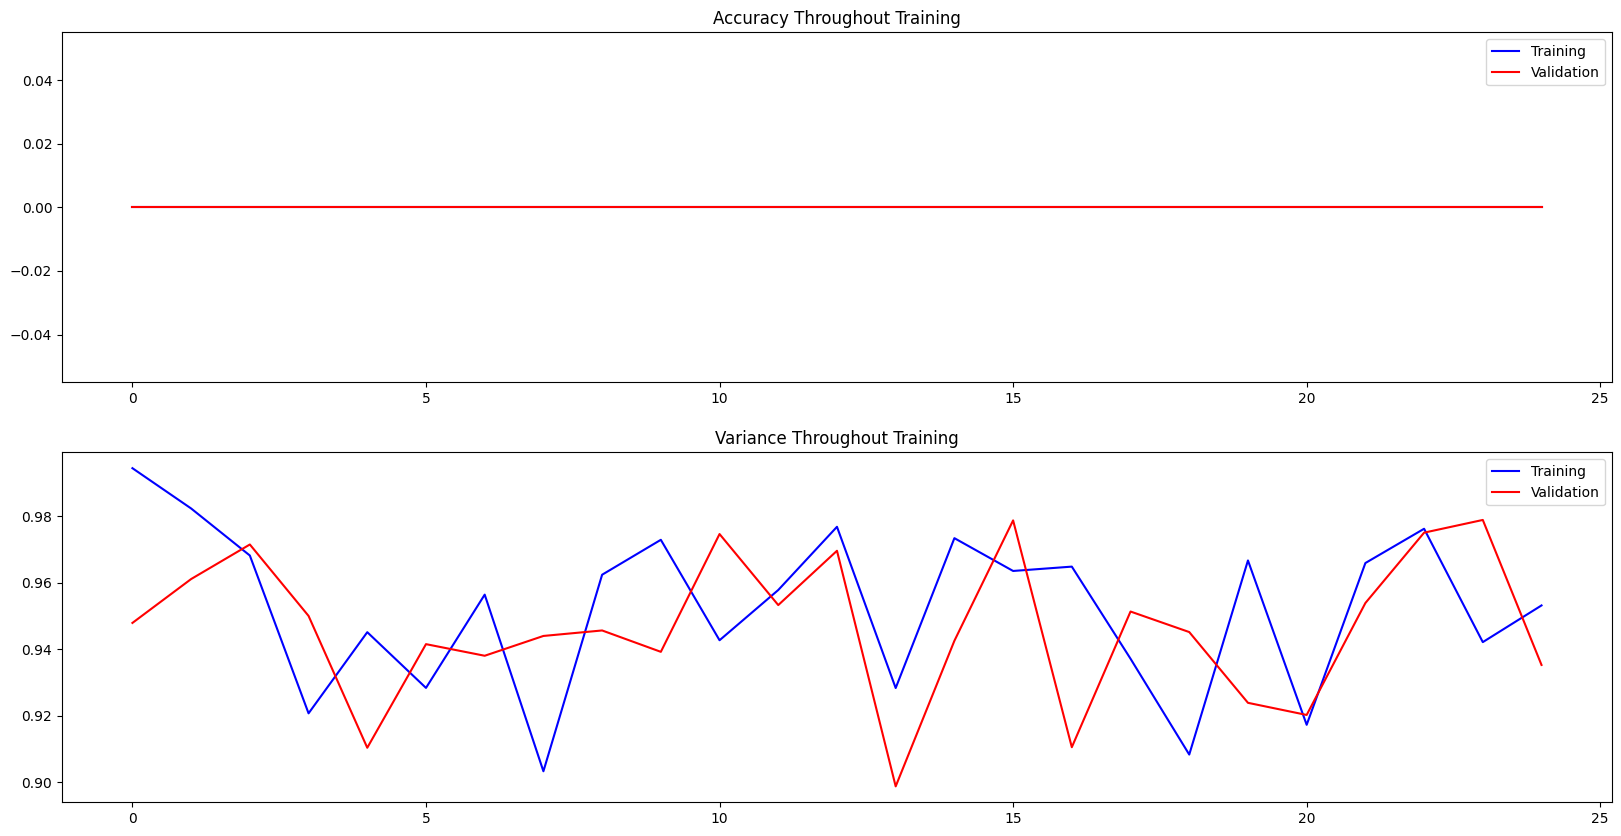

In [22]:
bnn.visualize_model_performance()

In [23]:
# model performance after training
bnn.bnn_fp.feed_forward_neural_network(bnn.m, bnn.v, bnn.feature_data, bnn.model_structure, model_purpose=bnn.model_purpose)[0]

array([-0.336, -0.344, -0.344, -0.32 , -0.336, -0.312, -0.304, -0.336,
       -0.312, -0.296, -0.304, -0.344, -0.328, -0.336, -0.328, -0.304,
       -0.32 , -0.304, -0.304, -0.32 , -0.32 , -0.312, -0.304, -0.304,
       -0.328, -0.28 , -0.336, -0.296, -0.288, -0.32 , -0.32 , -0.32 ,
       -0.328, -0.312, -0.296, -0.304, -0.312, -0.304, -0.32 , -0.32 ,
       -0.32 , -0.312, -0.304, -0.304, -0.288, -0.312, -0.312, -0.296,
       -0.304, -0.304, -0.304, -0.312, -0.312, -0.312, -0.304, -0.304,
       -0.328, -0.312, -0.312, -0.312, -0.336, -0.304, -0.304, -0.304,
       -0.304, -0.312, -0.32 , -0.32 , -0.32 , -0.312, -0.312, -0.312,
       -0.304, -0.352, -0.296, -0.336, -0.296, -0.296, -0.296, -0.296,
       -0.296, -0.336, -0.352, -0.352, -0.344, -0.32 , -0.352, -0.328,
       -0.344, -0.32 ])

# Model Performance On 50 Samples of Non-Fraudulent Data and 50 Samples of Fraudulent Data

In [24]:
df_minus_1 = df.loc[df['Class'] == -1, :].head(50)
df_1 = df.loc[df['Class'] == 1, :].head(50)
df_1_minus_1 = pd.concat([df_minus_1, df_1]).sample(frac=1)

In [25]:
feature_data = df_1_minus_1.loc[:, feature_columns].values
target_data = df_1_minus_1.loc[:, target_columns].values

In [26]:
input_layer = [28]
hidden_layers = [128, 64, 32, 16, 8, 4, 2]
output_layer = [1]

total_epochs = 25
learning_rate = 1e-4

validation_percentage = 0.1
model_purpose = 'binary'
learning_rate_decay_type = 'exponential'

In [27]:
bnn = bayesian_neural_network(input_layer, 
                              hidden_layers, 
                              output_layer, 
                              feature_data, 
                              target_data, 
                              validation_percentage=validation_percentage,
                              model_purpose=model_purpose, 
                              learning_rate=learning_rate)
bnn.standardize_dataset()
bnn.generate_validation_training_dataset()
bnn.generate_m()
bnn.generate_v()

In [28]:
# model performance on predicting fraudulent data before training
bnn.bnn_fp.feed_forward_neural_network(bnn.m, bnn.v, bnn.feature_data[bnn.target_data == 1], bnn.model_structure, model_purpose=bnn.model_purpose)[0]

array([-0.312, -0.288, -0.32 , -0.288, -0.288, -0.304, -0.296, -0.296,
       -0.296, -0.304, -0.328, -0.296, -0.296, -0.312, -0.336, -0.272,
       -0.296, -0.312, -0.296, -0.28 , -0.296, -0.328, -0.272, -0.272,
       -0.296, -0.28 , -0.32 , -0.28 , -0.296, -0.288, -0.296, -0.296,
       -0.288, -0.28 , -0.288, -0.312, -0.288, -0.304, -0.28 , -0.28 ,
       -0.272, -0.312, -0.288, -0.304, -0.312, -0.272])

In [29]:
# model performance on predicting non-fraudulent data before training
bnn.bnn_fp.feed_forward_neural_network(bnn.m, bnn.v, bnn.feature_data[bnn.target_data == -1], bnn.model_structure, model_purpose=bnn.model_purpose)[0]

array([-0.352, -0.344, -0.344, -0.32 , -0.344, -0.336, -0.344, -0.32 ,
       -0.344, -0.344, -0.336, -0.352, -0.328, -0.352, -0.328, -0.328,
       -0.344, -0.36 , -0.344, -0.352, -0.344, -0.352, -0.36 , -0.352,
       -0.312, -0.344, -0.344, -0.344, -0.328, -0.328, -0.352, -0.32 ,
       -0.336, -0.344, -0.352, -0.352, -0.36 , -0.344, -0.352, -0.344,
       -0.344, -0.352, -0.352, -0.352])

In [30]:
bnn.train_model(total_epochs)

------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 1 / 25 - Learning Rate : 0.0001 - Succesfull Train Percentage : 100.0% - Time Passed : 0.88 Second
Accuracy : 48.888888888888886% - Standard Deviation : 0.9372679213921726
Validation Accuracy : 60.0% - Validation Standard Deviation : 0.9807754808746726
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 2 / 25 - Learning Rate : 0.0001 - Succesfull Train Percentage : 100.0% - Time Passed : 0.87 Second
Accuracy : 48.888888888888886% - Standard Deviation : 0.9685667133807019
Validation Accuracy : 60.0% - Validation Standard Deviation : 0.9589509289045003
-------------------------

In [31]:
# model performance on predicting fraudulent data after training
bnn.bnn_fp.feed_forward_neural_network(bnn.m, bnn.v, bnn.feature_data[bnn.target_data == 1], bnn.model_structure, model_purpose=bnn.model_purpose)[0]

array([-0.168, -0.176, -0.208, -0.208, -0.184, -0.208, -0.2  , -0.184,
       -0.224, -0.216, -0.176, -0.216, -0.184, -0.16 , -0.168, -0.2  ,
       -0.176, -0.192, -0.192, -0.208, -0.192, -0.192, -0.208, -0.2  ,
       -0.176, -0.208, -0.176, -0.2  , -0.168, -0.192, -0.176, -0.216,
       -0.2  , -0.2  , -0.192, -0.176, -0.176, -0.168, -0.176, -0.192,
       -0.192, -0.2  , -0.2  , -0.216, -0.216, -0.2  ])

In [32]:
# model performance on predicting non-fraudulent data after training
bnn.bnn_fp.feed_forward_neural_network(bnn.m, bnn.v, bnn.feature_data[bnn.target_data == -1], bnn.model_structure, model_purpose=bnn.model_purpose)[0]

array([-0.272, -0.272, -0.28 , -0.304, -0.272, -0.28 , -0.28 , -0.272,
       -0.272, -0.264, -0.272, -0.272, -0.272, -0.256, -0.264, -0.288,
       -0.28 , -0.28 , -0.256, -0.288, -0.296, -0.256, -0.288, -0.264,
       -0.296, -0.28 , -0.256, -0.28 , -0.28 , -0.264, -0.28 , -0.272,
       -0.288, -0.288, -0.272, -0.248, -0.264, -0.28 , -0.296, -0.288,
       -0.272, -0.28 , -0.264, -0.264])

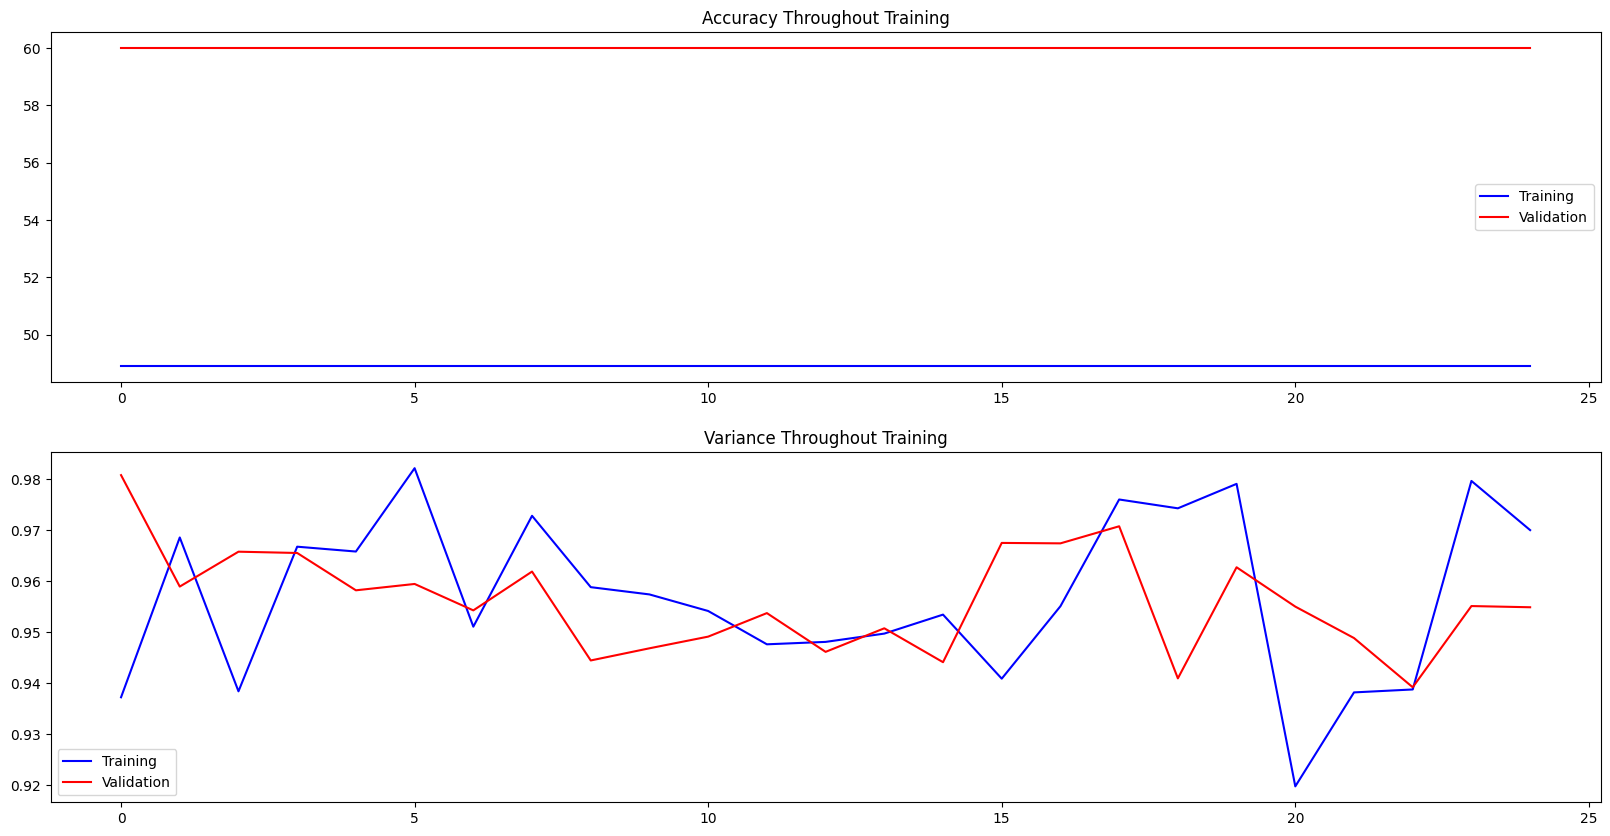

In [33]:
bnn.visualize_model_performance()